In [1]:
import gensim
from sklearn.decomposition import PCA
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import arabic_reshaper
import pandas as pd
from word2vec_results import *

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
rezk_model = gensim.models.Word2Vec.load("Twittert-CBOW/fullgram/CBOW_space_300/min_count_100/window_3/continuous_bow_fullgram_vec_size_300-d_min_count_100")

In [3]:
vocabs = list(rezk_model.wv.index_to_key)
print("The number of words the model learn from your dataset are:", len(vocabs))
print(vocabs[:100])

The number of words the model learn from your dataset are: 2027042
['.', '._.', 'و', ':', 'رابطويب', 'في', '._رابطويب', '._._رابطويب', 'من', 'حسابشخصي', 'علي', 'ا', ')', '._._.', '(', 'ان', 'ا_.', '!', 'الله', 'ا_._.', ',', '-', 'ما', 'ب', '؟', 'ف', 'عن', 'الي', 'لا', 'ع', 'مع', ':_)', 'ب_)', 'انا', 'يا', ')_-', 'ب_)_-', '(_ا', 'اليوم', 'ا_ف', '(_ا_ف', 'ا_ف_ب', 'ف_ب', 'ف_ب_)', '&', ';', 'بعد', 'كل', 'مقتل', 'بين', '!_!', 'م', '،', 'غزه', 'اللي', '._و', '/', 'بس', 'رئيس', 'م_.', 'الرئيس', 'م_._.', '._._و', 'بي', 'قطره', 'قطره_:', 'ل', 'العراق', 'و_لا', 'ب_.', 'ب_._.', 'اي', 'هذا', 'ضد', 'جديد', 'فيه', 'يوم', 'و_.', 'و_._.', 'الا', 'هو', '#', 'الجيش', 'المتحده', 'لبنان', ';_&', 'ف_.', 'اسرائيل', 'انه', 'ف_._.', 'كان', 'اذا', 'السلام', 'الحكومه', 'لـ', 'ل_.', 'قال', ':_(', '&_#', 'لك']


In [4]:
rezk_model.wv.most_similar('طنطا')

[('المنصوره', 0.8620675802230835),
 ('الزقازيق', 0.7875745892524719),
 ('اسكندريه', 0.7411830425262451),
 ('اسيوط', 0.7398534417152405),
 ('المنوفيه', 0.7239159941673279),
 ('المنيا', 0.7057349681854248),
 ('دمنهور', 0.6983345150947571),
 ('القاهره', 0.6881973743438721),
 ('دمياط', 0.6874301433563232),
 ('حلوان', 0.6631385087966919)]

In [5]:
rezk_model.wv.most_similar('فندق')

[('بفندق', 0.6959010362625122),
 ('الفندق', 0.6875008940696716),
 ('منتجع', 0.6816150546073914),
 ('وفندق', 0.6477185487747192),
 ('شاليه', 0.6472563147544861),
 ('فنادق', 0.6468909978866577),
 ('مول', 0.639947772026062),
 ('مطل', 0.5941099524497986),
 ('شقه', 0.5838247537612915),
 ('مطعم', 0.5816810727119446)]

In [6]:
rezk_model.wv.most_similar(positive=['ملك', 'امراءه'], negative=['رجل'])

[('ملكه', 0.4930158853530884),
 ('الملكه', 0.3743601143360138),
 ('لملك', 0.36380499601364136),
 ('مستعمره', 0.35215845704078674),
 ('عرش', 0.3518524467945099),
 ('لقبها', 0.3472043573856354),
 ('وعايشه', 0.3448868691921234),
 ('وهي', 0.34364351630210876),
 ('وملكه', 0.34195131063461304),
 ('وملك', 0.3394363224506378)]

In [7]:
rezk_model.wv.most_similar('🤣')

[('😆', 0.8333120942115784),
 ('😁', 0.8321138024330139),
 ('😜', 0.8205730319023132),
 ('😏', 0.819418728351593),
 ('😅', 0.8010570406913757),
 ('😒', 0.7967824339866638),
 ('هه', 0.7967004776000977),
 ('😂', 0.7781848907470703),
 ('😬', 0.7624844312667847),
 ('😀', 0.7618412375450134)]

In [8]:
rezk_model.wv.most_similar('🇰🇼')

[('🇴🇲', 0.6610525846481323),
 ('العيد_الوطني_الكويتي', 0.6014205813407898),
 ('اليوم_الوطني_الكويتي', 0.5943148732185364),
 ('🇦🇪', 0.5859056711196899),
 ('الكويت', 0.5772003531455994),
 ('🇸🇦', 0.5617915987968445),
 ('🇶🇦', 0.5346092581748962),
 ('عمان', 0.5341886281967163),
 ('🇯🇴', 0.5333636999130249),
 ('الحبيبه', 0.5255107283592224)]

In [9]:
rezk_model.wv.most_similar('📆')

[('🗓', 0.8217021226882935),
 ('🗓️', 0.7684130668640137),
 ('📅', 0.7220921516418457),
 ('الموافق', 0.7047532200813293),
 ('الثلاثاء', 0.6295244097709656),
 ('الاربعاء', 0.6129141449928284),
 ('مارس', 0.5877199769020081),
 ('مايو', 0.5591866970062256),
 ('المصادف', 0.558221161365509),
 ('/', 0.5580501556396484)]

In [10]:
rezk_model.wv.most_similar('ميموري')

[('ميموريز', 0.5878340005874634),
 ('الميموري', 0.5749548077583313),
 ('اكونت', 0.5458765029907227),
 ('هنزلها', 0.49145182967185974),
 ('الانستجرام', 0.48806169629096985),
 ('انستجرام', 0.4866439700126648),
 ('ابليكشن', 0.4857732951641083),
 ('الميموريز', 0.4829240143299103),
 ('ابلكيشن', 0.47917672991752625),
 ('بوست', 0.47330009937286377)]

In [11]:
rezk_model.wv.most_similar('A_+')

[('B_+', 0.4929687976837158),
 ('C_+', 0.4022066295146942),
 ('ا_+', 0.3840295076370239),
 ('A_1', 0.3682516813278198),
 ('A_-', 0.35698291659355164),
 ('O_+', 0.35411107540130615),
 ('حسابشخصي_+', 0.3405040204524994),
 ('الحلقه_الجايه', 0.3359083831310272),
 (')_+', 0.324415385723114),
 ('18_+', 0.31797125935554504)]

In [12]:
rezk_model.wv.most_similar('🏡')

[('📍', 0.4250869154930115),
 ('للبيع', 0.4209286570549011),
 ('سكني', 0.4186895489692688),
 ('بالرياض', 0.40717217326164246),
 ('عقارات_الرياض', 0.39545679092407227),
 ('🎯', 0.3946106731891632),
 ('فلل', 0.39185914397239685),
 ('شقه', 0.3904934823513031),
 ('دوبلكس', 0.3842267692089081),
 ('المونسيه', 0.381411612033844)]

In [13]:
rezk_model.wv.most_similar('IT')

[('تخصص', 0.5229156017303467),
 ('دبلوم', 0.5104511380195618),
 ('هندسه', 0.5050167441368103),
 ('HR', 0.4961112439632416),
 ('تخصصات', 0.49260127544403076),
 ('Design', 0.4920426309108734),
 ('science', 0.48735666275024414),
 ('english', 0.483235627412796),
 ('تخصصي', 0.4781688153743744),
 ('web', 0.4774109125137329)]

In [14]:
rezk_model.wv.most_similar('🔑')

[('مفتاح', 0.4421654939651489),
 ('🗝', 0.38557443022727966),
 ('🎯', 0.3628891706466675),
 ('🅰️', 0.34200042486190796),
 ('#_كلبه_مطيعه', 0.3347412347793579),
 ('المفتاح', 0.3305990993976593),
 ('♾', 0.32080593705177307),
 ('◉', 0.3206290006637573),
 ('✅', 0.3132442533969879),
 ('مفاتيح', 0.31249940395355225)]

In [15]:
rezk_model.wv.most_similar('؟')

[('🤔', 0.7987214922904968),
 ('!', 0.7966918349266052),
 ('ايش', 0.6314217448234558),
 ('😳', 0.6253553032875061),
 ('🙄', 0.6185094714164734),
 ('ليش', 0.60459965467453),
 ('هل', 0.5959916114807129),
 ('بالضبط', 0.5893946886062622),
 ('وليش', 0.5871163606643677),
 ('وين', 0.5863702893257141)]

In [16]:
print("The number of emojis: ", len(EMOJIS))
print("The number of sentiment words: ", len(SENTIMENT_WORDS))
print("The number of named entity recognition words", len(NER_WORDS))

The number of emojis:  48
The number of sentiment words:  19
The number of named entity recognition words 65


[t-SNE] Computing 18 nearest neighbors...
[t-SNE] Indexed 19 samples in 0.000s...
[t-SNE] Computed neighbors for 19 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 19 / 19
[t-SNE] Mean sigma: 3.651945
[t-SNE] KL divergence after 100 iterations with early exaggeration: 28.485743
[t-SNE] KL divergence after 150 iterations: 0.488962
The shape of our word_features is: (19, 2)


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


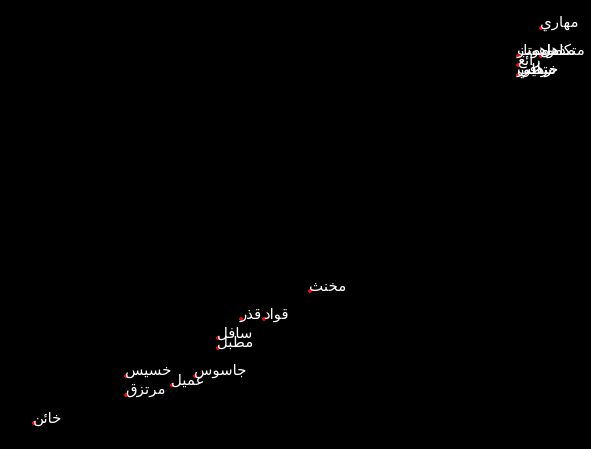

In [17]:
# Reduce the dimension of SENTIMENT_WORDS
tsne_df_scale = tsne_graph(rezk_model, SENTIMENT_WORDS, 500, .03)

_ = init_graph_style()

_ = word_display(tsne_df_scale, SENTIMENT_WORDS, "SENTIMENT_WORDS.png")

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 65 samples in 0.000s...
[t-SNE] Computed neighbors for 65 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 65 / 65
[t-SNE] Mean sigma: 2.998677
[t-SNE] KL divergence after 200 iterations with early exaggeration: 49.409805
[t-SNE] KL divergence after 1400 iterations: 0.251184
The shape of our word_features is: (65, 2)


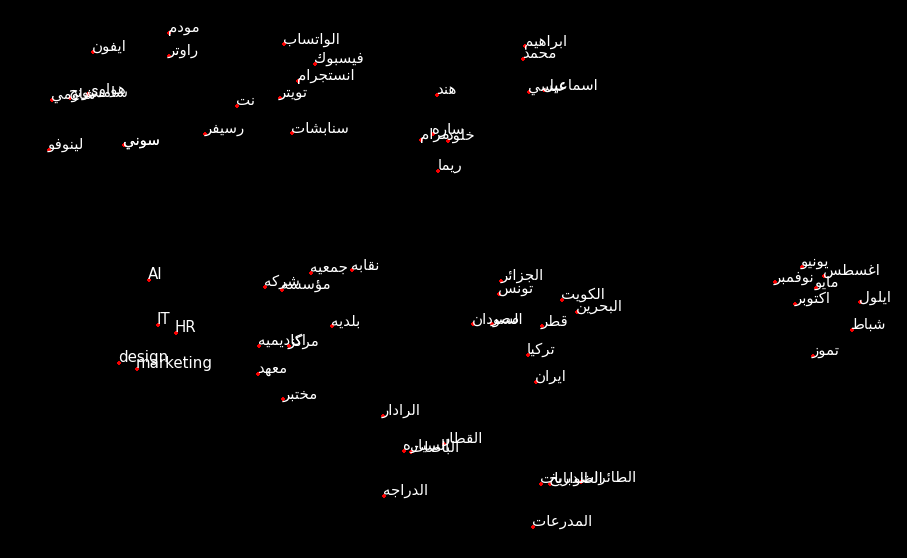

In [18]:
# Reduce the dimension of NER_WORDS
tsne_df_scale = tsne_graph(rezk_model, NER_WORDS, 1400, .03)

_ = init_graph_style(figsize=(16, 10))

_ = word_display(tsne_df_scale, NER_WORDS, "NER_WORDS.png")